# **MediaPipe Face Mesh Eye Tracking Project**

This notebook documents the development of a MediaPipe Face Mesh project for eye tracking, demonstrating how to detect facial landmarks, label them, focus on eye and iris landmarks, and estimate pupil positions to determine gaze direction.

---

## **Table of Contents**

1. [Setup](#setup)
2. [Stage 1: Detecting All Facial Landmarks](#stage-1)
3. [Stage 2: Labeling All Facial Landmarks](#stage-2)
4. [Stage 3: Focusing on Eye and Iris Landmarks](#stage-3)
5. [Stage 4: Estimating Pupil Position and Gaze Direction](#stage-4)
6. [Conclusion](#conclusion)

---

<a name="setup"></a>
## **Setup**

First, we'll set up the environment by installing the necessary packages and importing the required libraries.

### **Install Necessary Packages**

In [54]:
# Install specific versions to avoid dependency conflicts
!pip install protobuf==3.20.3
!pip install mediapipe==0.10.0 --no-deps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 22.2 MB/s eta 0:00:00
  Attempting uninstall: mediapipe
    Found existing installation: mediapipe 0.10.15
    Uninstalling mediapipe-0.10.15:
      Successfully uninstalled mediapipe-0.10.15


### **Import Libraries**

In [1]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
import itertools
import math

### **Upload and Load an Image**

We'll upload an image to process. Make sure to use an image with a clear view of the face and eyes.

Saving b2ap3_large_ee72093c-3c01-433a-8d25-701cca06c975.jpg to b2ap3_large_ee72093c-3c01-433a-8d25-701cca06c975 (1).jpg


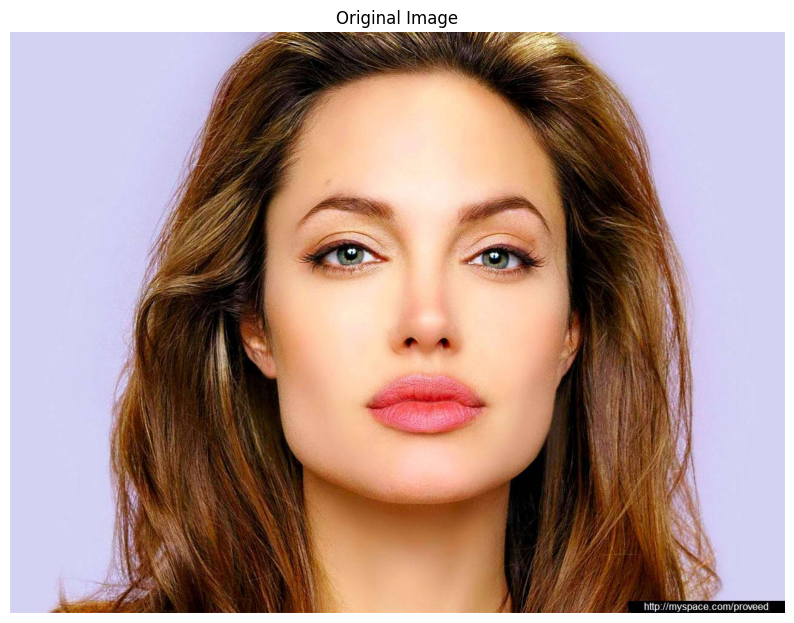

In [17]:
from google.colab import files
from google.colab.patches import cv2_imshow

# Upload an image
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]

# Read the image using OpenCV
image = cv2.imread(filename)

# Check if the image is loaded properly
if image is None:
    print("Error loading image.")
else:
    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the original image
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.title('Original Image')
    plt.axis('off')
    plt.show()

---
<a name="stage-1"></a>
## **Stage 1: Detecting All Facial Landmarks**

In this stage, we'll detect all the facial landmarks using MediaPipe Face Mesh and display them on the image.

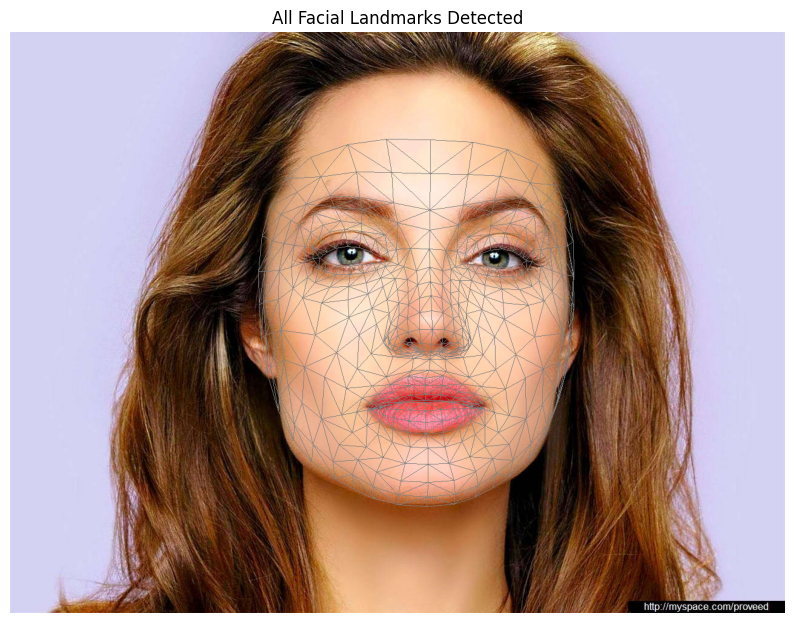

In [18]:
# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5)

# Process the image to find facial landmarks
results = face_mesh.process(image_rgb)

# Create a copy of the image to draw on
annotated_image = image_rgb.copy()

# Draw the facial landmarks
if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        # Draw face mesh landmarks
        mp.solutions.drawing_utils.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp.solutions.drawing_styles.get_default_face_mesh_tesselation_style())
else:
    print("No face landmarks detected.")

# Release the face mesh model
face_mesh.close()

# Display the annotated image
plt.figure(figsize=(10, 10))
plt.imshow(annotated_image)
plt.title('All Facial Landmarks Detected')
plt.axis('off')
plt.show()

### **Explanation**

- **Initialize Face Mesh Model**: Configured for static image processing.
- **Process Image**: Detects facial landmarks.
- **Draw Landmarks**: Uses MediaPipe's drawing utilities to overlay landmarks on the image.
- **Display Result**: Shows the image with all facial landmarks detected.

---

<a name="stage-2"></a>
## **Stage 2: Labeling All Facial Landmarks**

Now, we'll modify the code to label each facial landmark with its index. This can help in identifying specific landmarks.

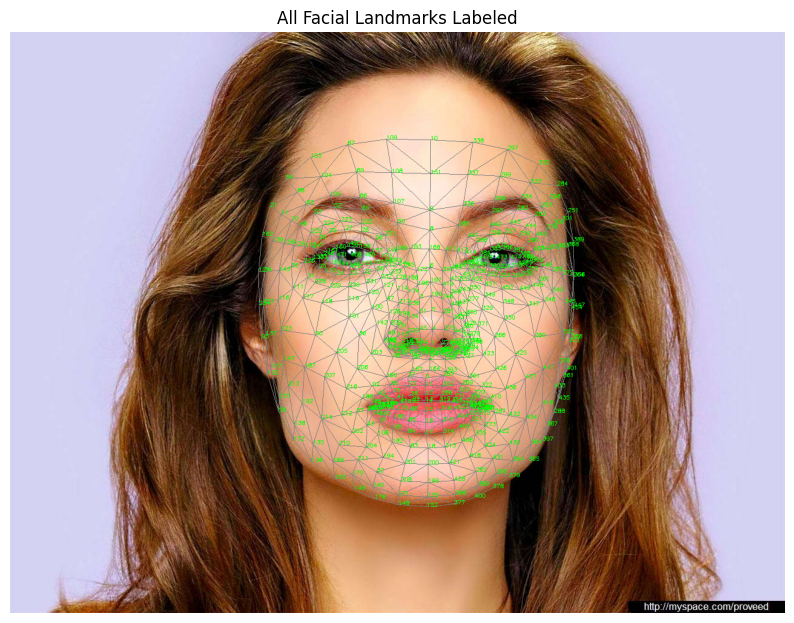

In [19]:
# Re-initialize Face Mesh
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5)

# Process the image
results = face_mesh.process(image_rgb)

# Create a copy of the image to draw on
annotated_image = image_rgb.copy()

# Draw and label facial landmarks
h, w, _ = image_rgb.shape

if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        # Draw landmarks
        mp.solutions.drawing_utils.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp.solutions.drawing_styles.get_default_face_mesh_tesselation_style())

        # Label each landmark
        for idx, landmark in enumerate(face_landmarks.landmark):
            x = int(landmark.x * w)
            y = int(landmark.y * h)
            cv2.putText(annotated_image, str(idx), (x, y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), 1)
else:
    print("No face landmarks detected.")

# Release the face mesh model
face_mesh.close()

# Display the annotated image
plt.figure(figsize=(10, 10))
plt.imshow(annotated_image)
plt.title('All Facial Landmarks Labeled')
plt.axis('off')
plt.show()

### **Explanation**

- **Label Each Landmark**: For each detected landmark, its index is placed next to it on the image.
- **Visualization**: Helps in identifying the indices of specific facial landmarks.

---

<a name="stage-3"></a>
## **Stage 3: Focusing on Eye and Iris Landmarks**

We'll focus on detecting and labeling only the eye and iris landmarks to reduce clutter and concentrate on the areas of interest.

Landmark 474: x=0.6454702615737915, y=0.39162713289260864, z=0.031628940254449844
Landmark 475: x=0.6275820136070251, y=0.3707379698753357, z=0.031628940254449844
Landmark 476: x=0.6093193888664246, y=0.3908275365829468, z=0.031628940254449844
Landmark 477: x=0.6272732019424438, y=0.41177213191986084, z=0.031628940254449844
Landmark 469: x=0.45715707540512085, y=0.3868723511695862, z=0.015386904589831829
Landmark 470: x=0.4390227794647217, y=0.36685532331466675, z=0.015386904589831829
Landmark 471: x=0.42115387320518494, y=0.38720041513442993, z=0.015386904589831829
Landmark 472: x=0.4394618272781372, y=0.40716788172721863, z=0.015386904589831829
Landmark 468: x=0.43935078382492065, y=0.386910617351532, z=0.015386904589831829
Landmark 473: x=0.6273489594459534, y=0.391263872385025, z=0.031628940254449844


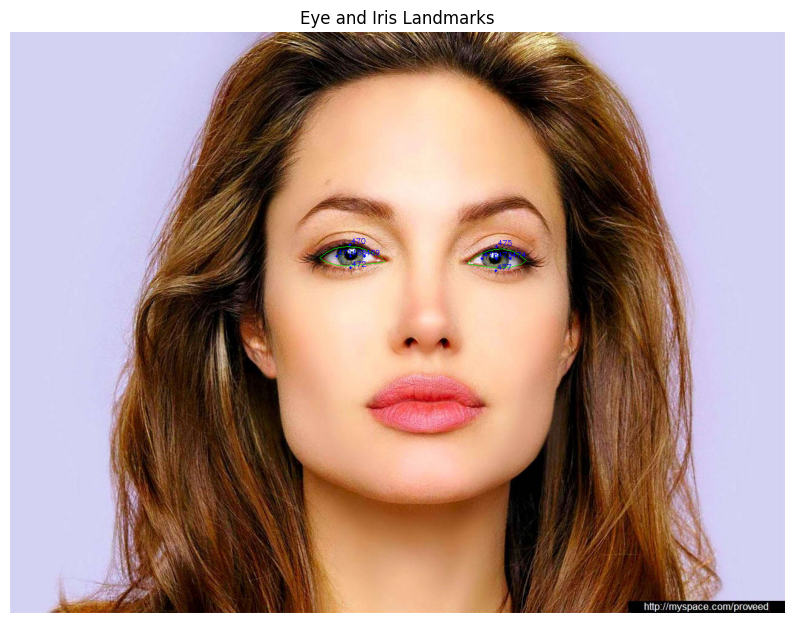

In [20]:
# Initialize Face Mesh and Drawing Utilities
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils

# Define indices for eye and iris landmarks
LEFT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_EYE)))
RIGHT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_EYE)))
LEFT_IRIS_INDEXES = [474, 475, 476, 477]
RIGHT_IRIS_INDEXES = [469, 470, 471, 472]
PUPIL_INDEXES = [468, 473]

# Define a function to process the image
def process_eye_landmarks(image):
    h, w, _ = image.shape
    face_mesh = mp_face_mesh.FaceMesh(
        static_image_mode=True,
        max_num_faces=1,
        refine_landmarks=True,
        min_detection_confidence=0.5)

    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    annotated_image = image.copy()

    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            # Draw eye contours
            mp_drawing.draw_landmarks(
                image=annotated_image,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_LEFT_EYE,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=1))
            mp_drawing.draw_landmarks(
                image=annotated_image,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_RIGHT_EYE,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=1))

            # Draw iris landmarks
            for idx in LEFT_IRIS_INDEXES + RIGHT_IRIS_INDEXES + PUPIL_INDEXES:
                landmark = face_landmarks.landmark[idx]
                x = int(landmark.x * w)
                y = int(landmark.y * h)
                cv2.circle(annotated_image, (x, y), 2, (255, 0, 0), -1)
                cv2.putText(annotated_image, str(idx), (x + 2, y - 2),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 1)

                # Print the landmark coordinates
                print(f"Landmark {idx}: x={landmark.x}, y={landmark.y}, z={landmark.z}")
    else:
        print("No face landmarks detected.")

    face_mesh.close()
    return annotated_image

# Process the image
annotated_image = process_eye_landmarks(image)

# Display the annotated image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.title('Eye and Iris Landmarks')
plt.axis('off')
plt.show()

### **Explanation**

- **Focus on Eyes and Iris**: Only the landmarks around the eyes and irises are detected and labeled.
- **Print Landmark Coordinates**: The indices and normalized coordinates of these landmarks are printed to the console.
- **Visualization**: Reduces clutter by displaying only relevant landmarks.

---

<a name="stage-4"></a>
## **Stage 4: Estimating Pupil Position and Gaze Direction**

In this final stage, we'll use the iris and eye landmarks to estimate the pupil position and determine the gaze direction (left, right, up, down).

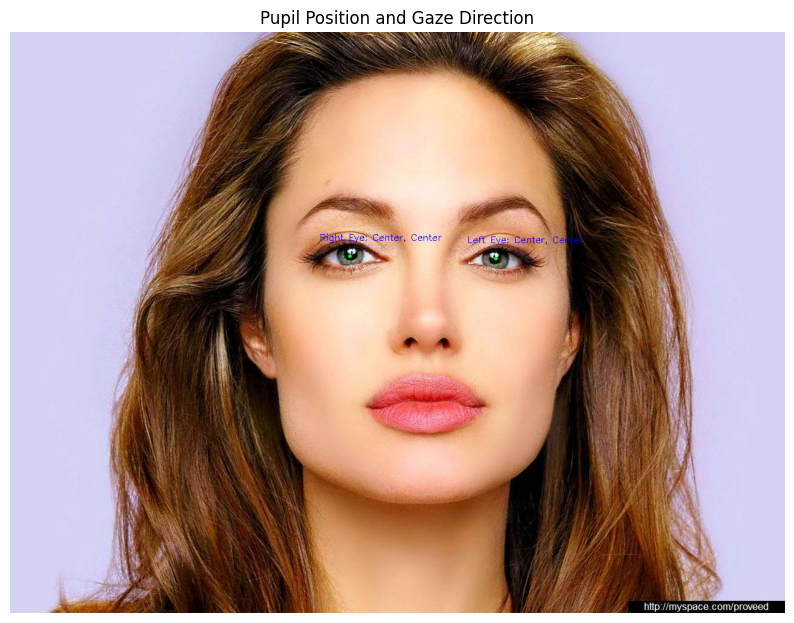

In [21]:
def get_landmark_coordinates(landmarks, indices, image_width, image_height):
    coords = []
    for idx in indices:
        landmark = landmarks[idx]
        x = int(landmark.x * image_width)
        y = int(landmark.y * image_height)
        coords.append((x, y))
    return coords

def calculate_iris_center(iris_landmarks):
    x_coords = [coord[0] for coord in iris_landmarks]
    y_coords = [coord[1] for coord in iris_landmarks]
    center_x = int(sum(x_coords) / len(x_coords))
    center_y = int(sum(y_coords) / len(y_coords))
    return (center_x, center_y)

def get_eye_bounds(eye_landmarks):
    x_coords = [coord[0] for coord in eye_landmarks]
    y_coords = [coord[1] for coord in eye_landmarks]
    x_min = min(x_coords)
    x_max = max(x_coords)
    y_min = min(y_coords)
    y_max = max(y_coords)
    return x_min, x_max, y_min, y_max

def get_normalized_iris_position(iris_center, eye_bounds):
    x_min, x_max, y_min, y_max = eye_bounds
    iris_x, iris_y = iris_center
    x_ratio = (iris_x - x_min) / (x_max - x_min)
    y_ratio = (iris_y - y_min) / (y_max - y_min)
    return x_ratio, y_ratio

def determine_gaze_direction(x_ratio, y_ratio, threshold=0.35):
    if x_ratio < (0.5 - threshold):
        horizontal_direction = "Left"
    elif x_ratio > (0.5 + threshold):
        horizontal_direction = "Right"
    else:
        horizontal_direction = "Center"

    if y_ratio < (0.5 - threshold):
        vertical_direction = "Up"
    elif y_ratio > (0.5 + threshold):
        vertical_direction = "Down"
    else:
        vertical_direction = "Center"

    return horizontal_direction, vertical_direction

def process_frame(image):
    h, w, _ = image.shape
    face_mesh = mp_face_mesh.FaceMesh(
        static_image_mode=True,
        max_num_faces=1,
        refine_landmarks=True,
        min_detection_confidence=0.5)

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(image_rgb)
    annotated_image = image.copy()

    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            # Left eye
            left_eye_indexes = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_EYE)))
            left_iris_indexes = [474, 475, 476, 477]
            left_eye_landmarks = get_landmark_coordinates(face_landmarks.landmark, left_eye_indexes, w, h)
            left_iris_landmarks = get_landmark_coordinates(face_landmarks.landmark, left_iris_indexes, w, h)
            left_iris_center = calculate_iris_center(left_iris_landmarks)
            left_eye_bounds = get_eye_bounds(left_eye_landmarks)
            left_x_ratio, left_y_ratio = get_normalized_iris_position(left_iris_center, left_eye_bounds)
            left_horizontal, left_vertical = determine_gaze_direction(left_x_ratio, left_y_ratio)

            # Right eye
            right_eye_indexes = list(set(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_EYE)))
            right_iris_indexes = [469, 470, 471, 472]
            right_eye_landmarks = get_landmark_coordinates(face_landmarks.landmark, right_eye_indexes, w, h)
            right_iris_landmarks = get_landmark_coordinates(face_landmarks.landmark, right_iris_indexes, w, h)
            right_iris_center = calculate_iris_center(right_iris_landmarks)
            right_eye_bounds = get_eye_bounds(right_eye_landmarks)
            right_x_ratio, right_y_ratio = get_normalized_iris_position(right_iris_center, right_eye_bounds)
            right_horizontal, right_vertical = determine_gaze_direction(right_x_ratio, right_y_ratio)

            # Draw gaze direction on image
            cv2.putText(annotated_image, f"Left Eye: {left_horizontal}, {left_vertical}",
                        (left_eye_bounds[0], left_eye_bounds[2] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
            cv2.putText(annotated_image, f"Right Eye: {right_horizontal}, {right_vertical}",
                        (right_eye_bounds[0], right_eye_bounds[2] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

            # Draw iris centers
            cv2.circle(annotated_image, left_iris_center, 3, (0, 255, 0), -1)
            cv2.circle(annotated_image, right_iris_center, 3, (0, 255, 0), -1)
    else:
        print("No face landmarks detected.")

    face_mesh.close()
    return annotated_image

# Process the image
annotated_image = process_frame(image)

# Display the annotated image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.title('Pupil Position and Gaze Direction')
plt.axis('off')
plt.show()

### **Explanation**

- **Calculate Iris Center**: Computes the center of the iris using iris landmarks.
- **Determine Eye Bounds**: Finds the bounding box of the eye using eye landmarks.
- **Normalize Iris Position**: Calculates the position of the iris center within the eye region.
- **Estimate Gaze Direction**: Determines if the gaze is left, right, up, or down based on the normalized position.
- **Draw Results**: Annotates the image with the gaze direction and draws the iris centers.

---

<a name="conclusion"></a>
## **Conclusion**

This notebook has documented the progression of developing an eye-tracking application using MediaPipe Face Mesh. Starting from detecting all facial landmarks, we progressively focused on the eyes and iris, and finally estimated the pupil position to determine gaze direction.

- **Stage 1**: Detected all facial landmarks.
- **Stage 2**: Labeled all facial landmarks for identification.
- **Stage 3**: Focused on eye and iris landmarks, reducing clutter.
- **Stage 4**: Estimated pupil position and gaze direction based on iris landmarks.

---

**Note**: The accuracy of gaze direction estimation may vary depending on the quality of the input image, lighting conditions, and individual differences. For more accurate results, consider implementing calibration steps or advanced gaze estimation techniques.